In [1]:
import warnings
import numpy as np 
import pandas as pd 
from math import sqrt
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Phys_Descrip.txt')

In [3]:
data.drop(['Config','Ecoh','Eb','Eadh'], axis=1, inplace=True)

In [4]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

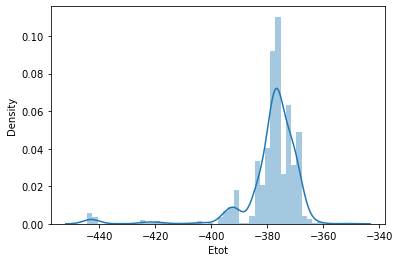

In [6]:
sns.distplot(y);

In [7]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

### Model Evaluation 

In [8]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9858299604616529


In [9]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8956119848265309


In [10]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [11]:
score.mean()

-0.828501511284576

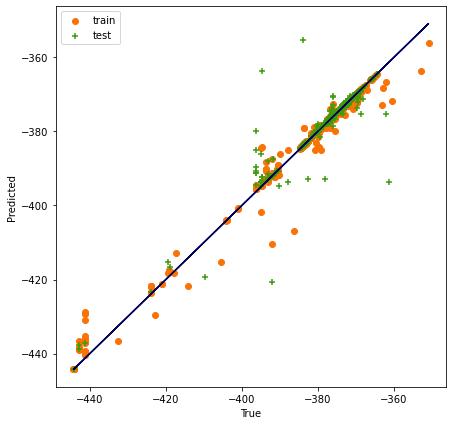

In [12]:
prediction_test=regressor.predict(X_test)
prediction_train=regressor.predict(X_train)

plt.figure(figsize=(7,7))
plt.scatter(y_train,prediction_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,prediction_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

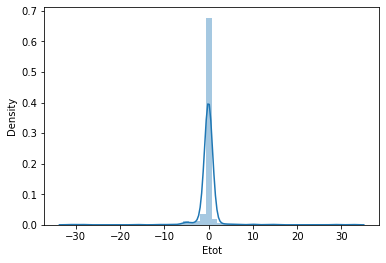

In [13]:
sns.distplot(y_test-prediction_test);

In [14]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, prediction_test),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, prediction_test),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, prediction_test)),2)))
print('R_squared:'+ str(round(r2_score(y_test,prediction_test),2)))
print('Accuracy',100-(np.mean(np.abs((y_test-prediction_test)/y_test))*100))

MAE: 0.74
MSE: 9.52
RMSE:3.09
R_squared:0.9
Accuracy 99.8081692688505


In [15]:
rf_Mae_1=(round(metrics.mean_absolute_error(y_test,prediction_test),2))
rf_Mse_1=(round(metrics.mean_squared_error(y_test,prediction_test),2))
rf_Rmse_1=(round(round(sqrt(metrics.mean_squared_error(y_test, prediction_test)),2)))
rf_R_squared_1=(round(metrics.r2_score(y_test,prediction_test),2))
rf_acc_1=(100-(np.mean(np.abs((y_test-prediction_test)/y_test))*100))

### FEATURE SELECTION 

In [16]:
regressor.fit(X,y)

RandomForestRegressor()

In [17]:
print(regressor.feature_importances_)

[0.51165988 0.00110879 0.00084034 0.00478917 0.32471393 0.00439655
 0.0048686  0.04728863 0.05392547 0.03767638 0.00873225]


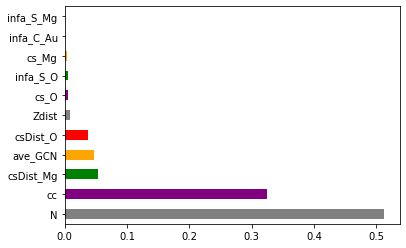

In [18]:
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh',color=['grey', 'purple', 'green', 'orange', 'red'])
plt.show()

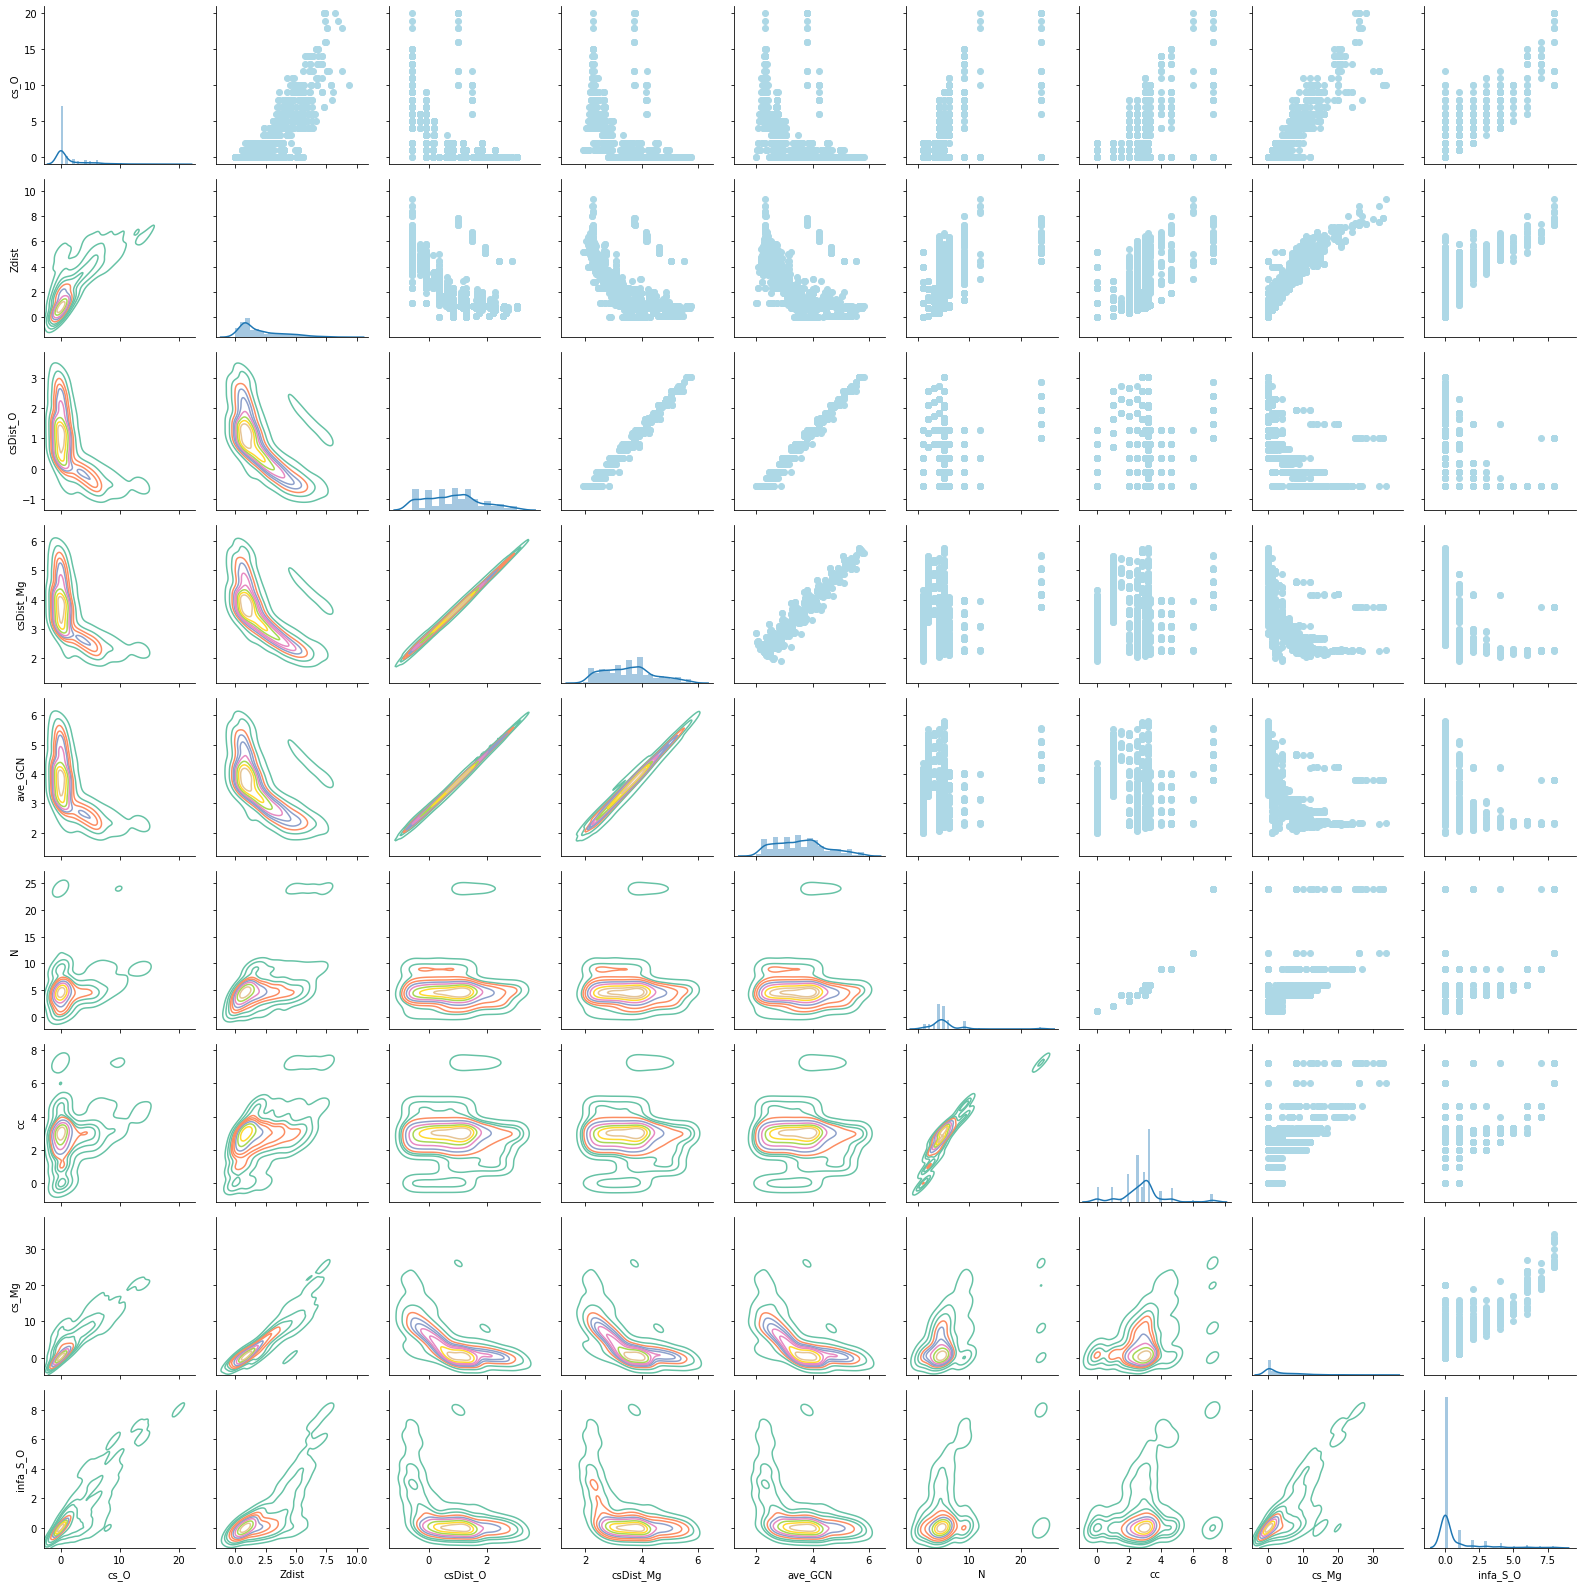

In [19]:
g=sns.PairGrid(data[['cs_O','Zdist','csDist_O','csDist_Mg','ave_GCN','N','cc','cs_Mg','infa_S_O']])
g.map_upper(plt.scatter, color='lightblue')
g.map_lower(sns.kdeplot,cmap='Set2')
g.map_diag(sns.distplot);

In [20]:
X2=X[['cs_O','Zdist','csDist_O','csDist_Mg','ave_GCN','N','cc','cs_Mg','infa_S_O']]

In [21]:
y

0      -367.335
1      -369.303
2      -369.386
3      -369.202
4      -368.988
         ...   
1834   -441.258
1835   -422.950
1836   -417.915
1837   -441.190
1838   -432.663
Name: Etot, Length: 1839, dtype: float64

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.3, random_state=0)

In [23]:
regressor.fit(X_train1,y_train1)

RandomForestRegressor()

In [24]:
y_pred=regressor.predict(X_test1)

In [25]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, y_pred),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, y_pred),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, y_pred)),2)))
print('R_squared:'+ str(round(r2_score(y_test,y_pred),2)))
print('Accuracy',100-(np.mean(np.abs((y_test-y_pred)/y_test))*100))

MAE: 0.76
MSE: 9.91
RMSE:3.15
R_squared:0.89
Accuracy 99.80364219899161


In [26]:
rf_Mae_2=(round(metrics.mean_absolute_error(y_test,y_pred),2))
rf_Mse_2=(round(metrics.mean_squared_error(y_test,y_pred),2))
rf_Rmse_2=(round(round(sqrt(metrics.mean_squared_error(y_test, y_pred)),2)))
rf_R_squared_2=(round(metrics.r2_score(y_test,y_pred),2))
rf_acc_2=(100-(np.mean(np.abs((y_test-y_pred)/y_test))*100))

### HYPER PARAMETER OPTIMIZATION

In [27]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [30]:
rf_random.fit(X_train1,y_train1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

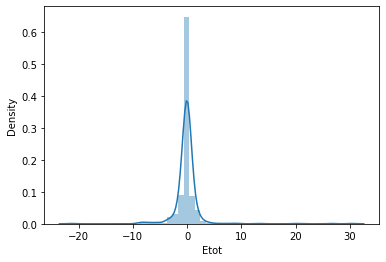

In [32]:
predictions=rf_random.predict(X_test1)
sns.distplot(y_test1-predictions);

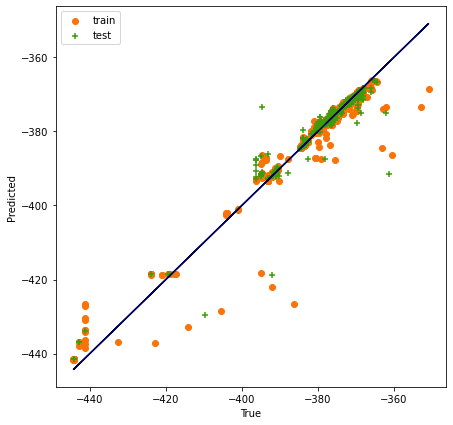

In [33]:
prediction_train=rf_random.predict(X_train1)

plt.figure(figsize=(7,7))
plt.scatter(y_train1,prediction_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test1,predictions, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train1,y_train1, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions))
print('MSE:', metrics.mean_squared_error(y_test1, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions)))
print('R_squared:'+ str(round(r2_score(y_test1,predictions),2)))
print('Accuracy',100-(np.mean(np.abs((y_test1-predictions)/y_test1))*100))

MAE: 0.9458897203284897
MSE: 7.146399784567823
RMSE: 2.6732751045427072
R_squared:0.92
Accuracy 99.75356903555074


In [ ]:
rf_Mae_3=(round(metrics.mean_absolute_error(y_test1,predictions),2))
rf_Mse_3=(round(metrics.mean_squared_error(y_test1,predictions),2))
rf_Rmse_3=(round(round(sqrt(metrics.mean_squared_error(y_test1, predictions)),2)))
rf_R_squared_3=(round(metrics.r2_score(y_test1,predictions),2))
rf_acc_3=(100-(np.mean(np.abs((y_test1-predictions)/y_test))*100))

In [ ]:
df=pd.DataFrame({'all variables':[rf_Mse_1,rf_Rmse_1,rf_Mae_1,rf_R_squared_1,rf_acc_1],
              
              'Selected variables':[rf_Mse_2,rf_Rmse_2,rf_Mae_2,rf_R_squared_2,rf_acc_2],
             'Optimised model':[rf_Mse_3,rf_Rmse_3,rf_Mae_3,rf_R_squared_3,rf_acc_3],},
             index=['mean_squared_error','root_mean_squared_error', 'maximum_absolute_error', 'R_squared','Accuracy'])
roundTwoDecimals = df.round(decimals=2)
roundTwoDecimals

The random forest model performed better than the single decision tree, with hyperparameter optimization, we can see a slight improvement from the previous models.